<a href="https://colab.research.google.com/github/Niniola20/exam_result/blob/main/exam_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
This dataset is used to analyze what factors affect the a student's performance. Each factor is classified into ranks so, this way, we are able to which signifcantly affects student's score. The variables are:
1. Gender
2. Race/Ethnicity
3. Parental level of education
4. Lunch
5. Test preparation score

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

###Reading csv file from working directory

In [2]:
exam_results =pd.read_csv('exam_results.csv')

###Listing directory

In [3]:
os.listdir(".")

['.config', 'exam_results.csv', 'sample_data']

###Displaying dataset

In [4]:
exam_results.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###Renaming colums

In [45]:
exam_results.rename(columns={"race/ethnicity":"ethnicity", "parental level of education":"parent_education",
                             "test preparation score":"test_prep_course", "math score":"math", 
                             "reading score":"reading","writing score":"writing"}, inplace=True)
exam_results.rename(columns={"test preparation course":"test_prep"}, inplace= True)
exam_results.head()

,gender,ethnicity,parent_education,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###Data types

In [6]:
exam_results.dtypes

gender                     object
ethnicity                  object
parent_education           object
lunch                      object
test preparation course    object
math                        int64
reading                     int64
writing                     int64
dtype: object

In [7]:
exam_results[["gender", "math", "reading", "writing"]]

,gender,math,reading,writing
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75
...,...,...,...,...
995,female,88,99,95
996,male,62,55,55
997,female,59,71,65
998,female,68,78,77


### Showing score performance based on gender


Score performance for math

   gender       math
0  female  63.633205
1    male  68.728216


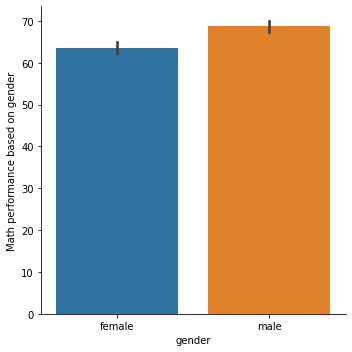

In [30]:
grade_avgmath = exam_results.groupby(["gender"], as_index=False) .math.mean()
print(grade_avgmath)
g= sns.catplot(x="gender", y = "math", data= exam_results, kind="bar", margin_titles= True);
g.set_ylabels("Math performance based on gender")
plt.show()


Score performance for writing

   gender    writing
0  female  72.467181
1    male  63.311203


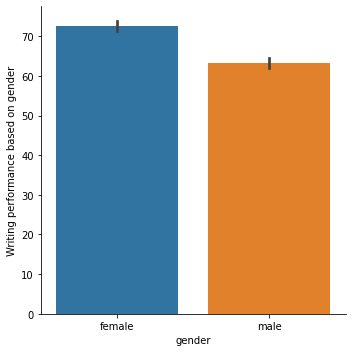

In [31]:
grade_avgwrite = exam_results.groupby(["gender"], as_index=False) .writing.mean()
print(grade_avgwrite)
g= sns.catplot(x="gender", y = "writing", data= exam_results, kind="bar");
g.set_ylabels("Writing performance based on gender")
plt.show()


Score performance for reading

   gender    reading
0  female  72.608108
1    male  65.473029


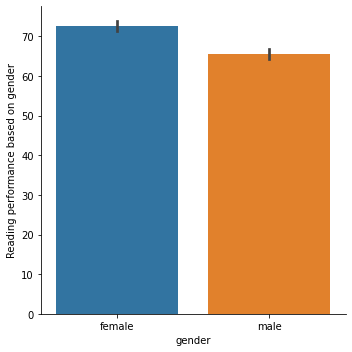

In [33]:
grade_avgread = exam_results.groupby(["gender"], as_index=False) .reading.mean()
print(grade_avgread)
g= sns.catplot(x="gender", y = "reading", data= exam_results, kind="bar");
g.set_ylabels("Reading performance based on gender")
plt.show()


In [39]:
exam_results.head()

,gender,ethnicity,parent_education,lunch,test preparation course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Performance per gender based on lunch

In [41]:
lunch_math = exam_results.groupby("lunch")["math"].mean()
print(lunch_math)

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64


In [42]:
lunch_read = exam_results.groupby("lunch")["reading"].mean()
print(lunch_read)

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64


In [43]:
lunch_write = exam_results.groupby("lunch")["writing"].mean()
print(lunch_write)

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64


Math score based on lunch

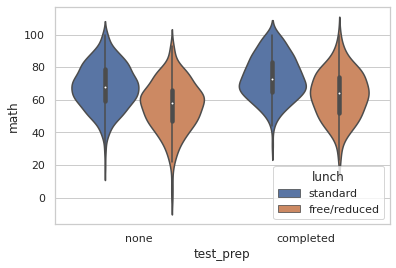

In [65]:
labels = ["math", "reading", "writing"]
free_lunch = [58.9, 64.7, 63.0]
standard_lunch = [70.0, 71.7, 70.8]

sns.set(style= "whitegrid")
g= sns.violinplot(x= "test_prep", y = "math", data= exam_results, hue = "lunch")


Reading score based on lunch

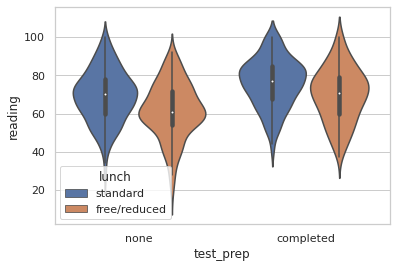

In [62]:
sns.set(style= "whitegrid")
g= sns.violinplot(x= "test_prep", y = "reading", data= exam_results, hue = "lunch")

Writing score based on lunch

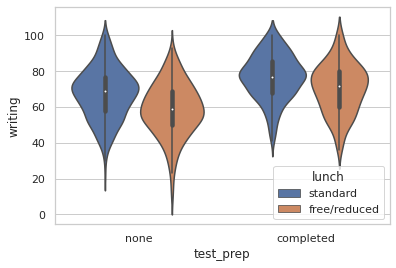

In [63]:
sns.set(style= "whitegrid")
g= sns.violinplot(x= "test_prep", y = "writing", data= exam_results, hue = "lunch")